# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


Untaring file...


### 2. Visualize the First 24 Training Images

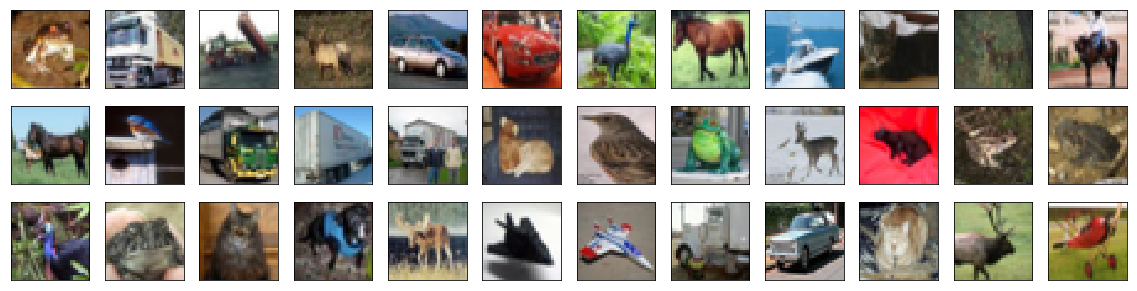

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [3]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [4]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 32)        416       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        4128      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        8256      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 16, 16, 64)        16448     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 8, 8, 64)          0         
__________

### 6. Compile the Model 

In [24]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

### 7. Train the Model 

In [25]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=256, epochs=150,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer], 
          verbose=True, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/150
45000/45000 [==============================] - 14s - loss: 2.0172 - acc: 0.2588 - val_loss: 1.6131 - val_acc: 0.4182
Epoch 2/150
45000/45000 [==============================] - 13s - loss: 1.6154 - acc: 0.4126 - val_loss: 1.3992 - val_acc: 0.4990
Epoch 3/150
45000/45000 [==============================] - 13s - loss: 1.4292 - acc: 0.4788 - val_loss: 1.2739 - val_acc: 0.5376
Epoch 4/150
45000/45000 [==============================] - 13s - loss: 1.3053 - acc: 0.5303 - val_loss: 1.1929 - val_acc: 0.5810
Epoch 5/150
45000/45000 [==============================] - 13s - loss: 1.1958 - acc: 0.5709 - val_loss: 1.1191 - val_acc: 0.6014
Epoch 6/150
45000/45000 [==============================] - 13s - loss: 1.1039 - acc: 0.6059 - val_loss: 1.0910 - val_acc: 0.6226
Epoch 7/150
45000/45000 [==============================] - 13s - loss: 1.0242 - acc: 0.6365 - val_loss: 0.9960 - val_acc: 0.6484
Epoch 8/150
45000/45000 [=======================

45000/45000 [==============================] - 13s - loss: 0.4458 - acc: 0.8432 - val_loss: 0.6595 - val_acc: 0.7730
Epoch 30/150
45000/45000 [==============================] - 13s - loss: 0.4404 - acc: 0.8470 - val_loss: 0.5983 - val_acc: 0.8108
Epoch 31/150
45000/45000 [==============================] - 13s - loss: 0.4268 - acc: 0.8495 - val_loss: 0.5977 - val_acc: 0.7994
Epoch 32/150
45000/45000 [==============================] - 13s - loss: 0.4198 - acc: 0.8528 - val_loss: 0.6592 - val_acc: 0.7800
Epoch 33/150
45000/45000 [==============================] - 13s - loss: 0.4156 - acc: 0.8550 - val_loss: 0.6433 - val_acc: 0.7966
Epoch 34/150
45000/45000 [==============================] - 13s - loss: 0.4109 - acc: 0.8589 - val_loss: 0.5975 - val_acc: 0.8108
Epoch 35/150
45000/45000 [==============================] - 13s - loss: 0.4006 - acc: 0.8589 - val_loss: 0.5941 - val_acc: 0.8078
Epoch 36/150
45000/45000 [==============================] - 13s - loss: 0.4012 - acc: 0.8608 - val_loss

45000/45000 [==============================] - 13s - loss: 0.3495 - acc: 0.8830 - val_loss: 0.6853 - val_acc: 0.8164
Epoch 62/150
45000/45000 [==============================] - 13s - loss: 0.3493 - acc: 0.8842 - val_loss: 0.6789 - val_acc: 0.8110
Epoch 63/150
45000/45000 [==============================] - 13s - loss: 0.3490 - acc: 0.8845 - val_loss: 0.6104 - val_acc: 0.8072
Epoch 64/150
45000/45000 [==============================] - 13s - loss: 0.3478 - acc: 0.8856 - val_loss: 0.6172 - val_acc: 0.8178
Epoch 65/150
45000/45000 [==============================] - 13s - loss: 0.3434 - acc: 0.8857 - val_loss: 0.6676 - val_acc: 0.8210
Epoch 66/150
45000/45000 [==============================] - 13s - loss: 0.3462 - acc: 0.8849 - val_loss: 0.6146 - val_acc: 0.8238
Epoch 67/150
45000/45000 [==============================] - 13s - loss: 0.3512 - acc: 0.8844 - val_loss: 0.7081 - val_acc: 0.8148
Epoch 68/150
45000/45000 [==============================] - 13s - loss: 0.3442 - acc: 0.8868 - val_loss

45000/45000 [==============================] - 13s - loss: 0.3438 - acc: 0.8897 - val_loss: 0.6606 - val_acc: 0.8210
Epoch 95/150
45000/45000 [==============================] - 13s - loss: 0.3486 - acc: 0.8870 - val_loss: 0.5900 - val_acc: 0.8164
Epoch 96/150
45000/45000 [==============================] - 13s - loss: 0.3523 - acc: 0.8875 - val_loss: 0.5820 - val_acc: 0.8234
Epoch 97/150
45000/45000 [==============================] - 13s - loss: 0.3557 - acc: 0.8867 - val_loss: 0.7120 - val_acc: 0.8196
Epoch 98/150
45000/45000 [==============================] - 13s - loss: 0.3448 - acc: 0.8884 - val_loss: 0.6126 - val_acc: 0.8274
Epoch 99/150
45000/45000 [==============================] - 13s - loss: 0.3458 - acc: 0.8893 - val_loss: 0.5842 - val_acc: 0.8220
Epoch 100/150
45000/45000 [==============================] - 13s - loss: 0.3423 - acc: 0.8885 - val_loss: 0.6023 - val_acc: 0.8198
Epoch 101/150
45000/45000 [==============================] - 13s - loss: 0.3503 - acc: 0.8888 - val_lo

45000/45000 [==============================] - 13s - loss: 0.3592 - acc: 0.8872 - val_loss: 0.5914 - val_acc: 0.8220
Epoch 127/150
45000/45000 [==============================] - 13s - loss: 0.3607 - acc: 0.8856 - val_loss: 0.6062 - val_acc: 0.8328
Epoch 128/150
45000/45000 [==============================] - 13s - loss: 0.3659 - acc: 0.8862 - val_loss: 0.6586 - val_acc: 0.7924
Epoch 129/150
45000/45000 [==============================] - 13s - loss: 0.3531 - acc: 0.8873 - val_loss: 0.6092 - val_acc: 0.8118
Epoch 130/150
45000/45000 [==============================] - 13s - loss: 0.3639 - acc: 0.8852 - val_loss: 0.6771 - val_acc: 0.8178
Epoch 131/150
45000/45000 [==============================] - 13s - loss: 0.3670 - acc: 0.8862 - val_loss: 0.5872 - val_acc: 0.8222
Epoch 132/150
45000/45000 [==============================] - 13s - loss: 0.3647 - acc: 0.8852 - val_loss: 0.6350 - val_acc: 0.7928
Epoch 133/150
45000/45000 [==============================] - 13s - loss: 0.3654 - acc: 0.8837 - v

### 8. Load the Model with the Best Validation Accuracy

In [26]:
# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [27]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.808


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [28]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

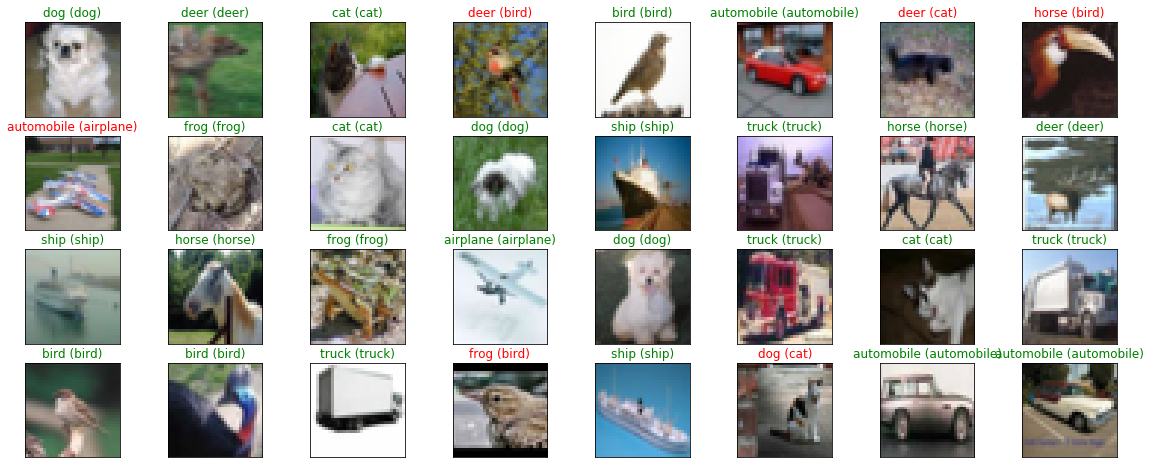

In [29]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))